# Main Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
file_cell_based_10x = os.path.join("..", "clean-files-ul", "cb" , "10", "rep_017.csv")
file_cell_free_10x = os.path.join("..", "clean-files-ul", "cf" , "10", "rep_017.csv")

## Calculations for 10X Scenarios

In [21]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (Mbps)"] = df_ue["Throughput_Mbps"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb = read_data_by_ue(file_cell_based_10x)
dfs_cf = read_data_by_ue(file_cell_free_10x)

# Sole behavior graphics

## Cell-Based 10x UE Throughput x Time

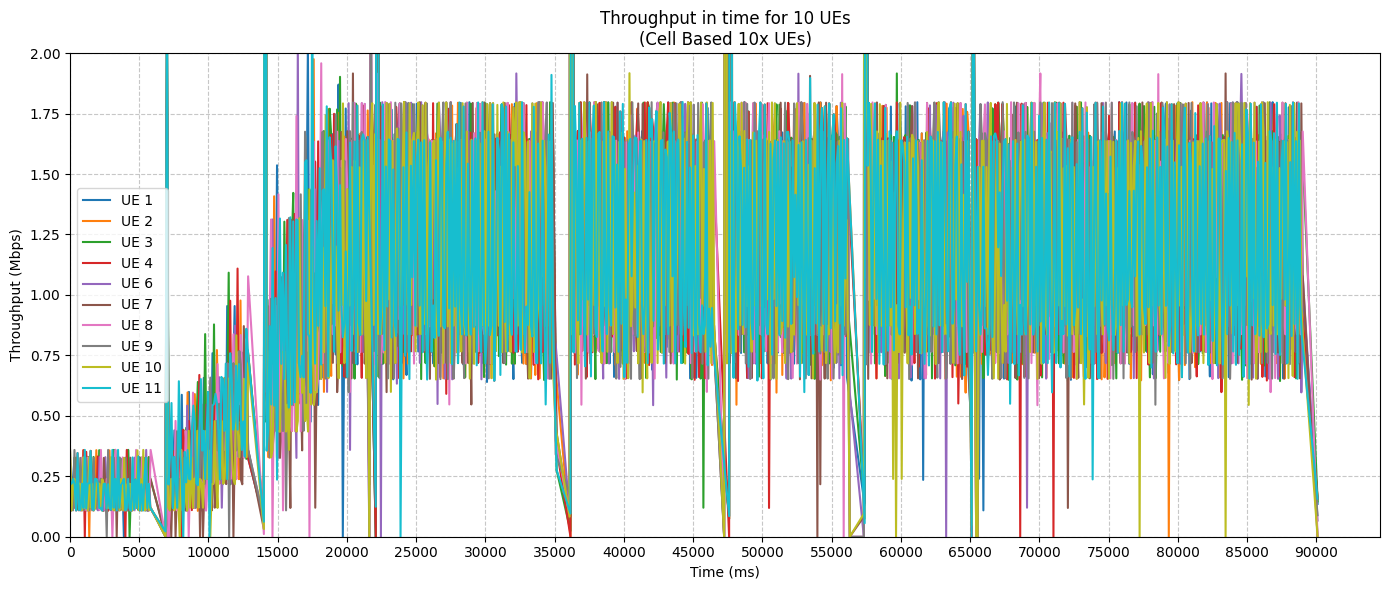

In [32]:
plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cb.items():
    dfs_cb[ue]["Throughput_Mbps"] = dfs_cb[ue]["Throughput_Mbps"].round(3)

    sns.lineplot(x="Time_ms", y="Throughput_Mbps", data=df, label=f"UE {ue}")

plt.title("Throughput in time for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

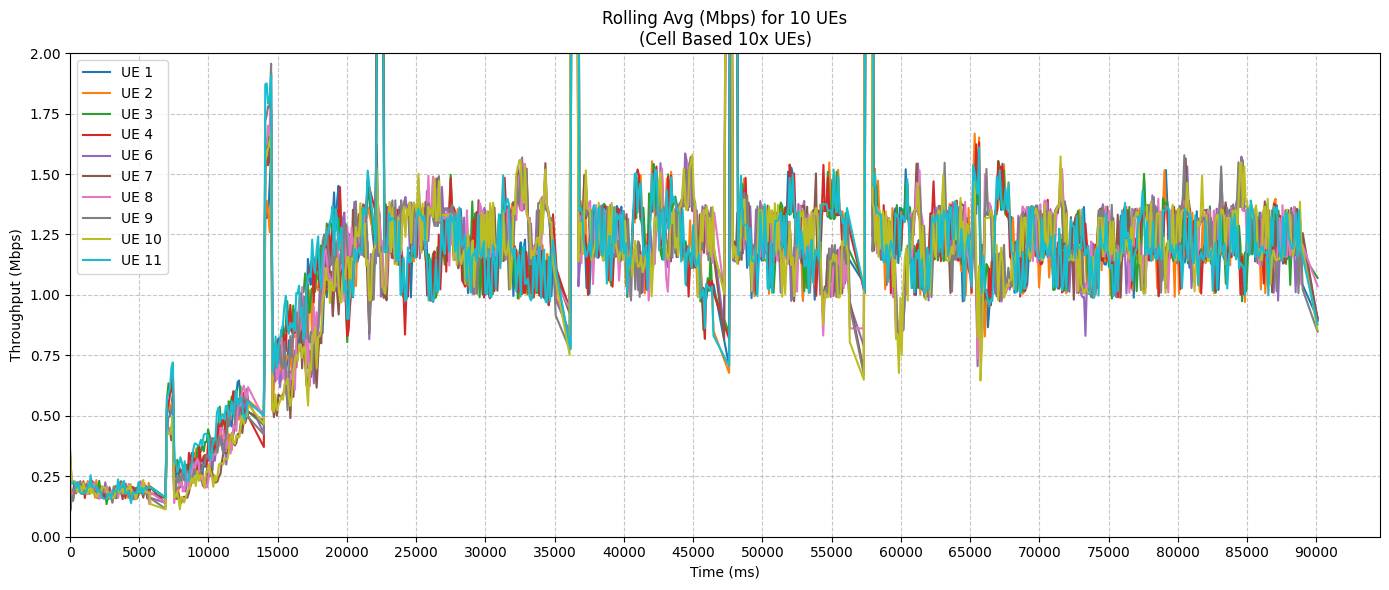

In [23]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cell-Free 10x UE Throughput x Time

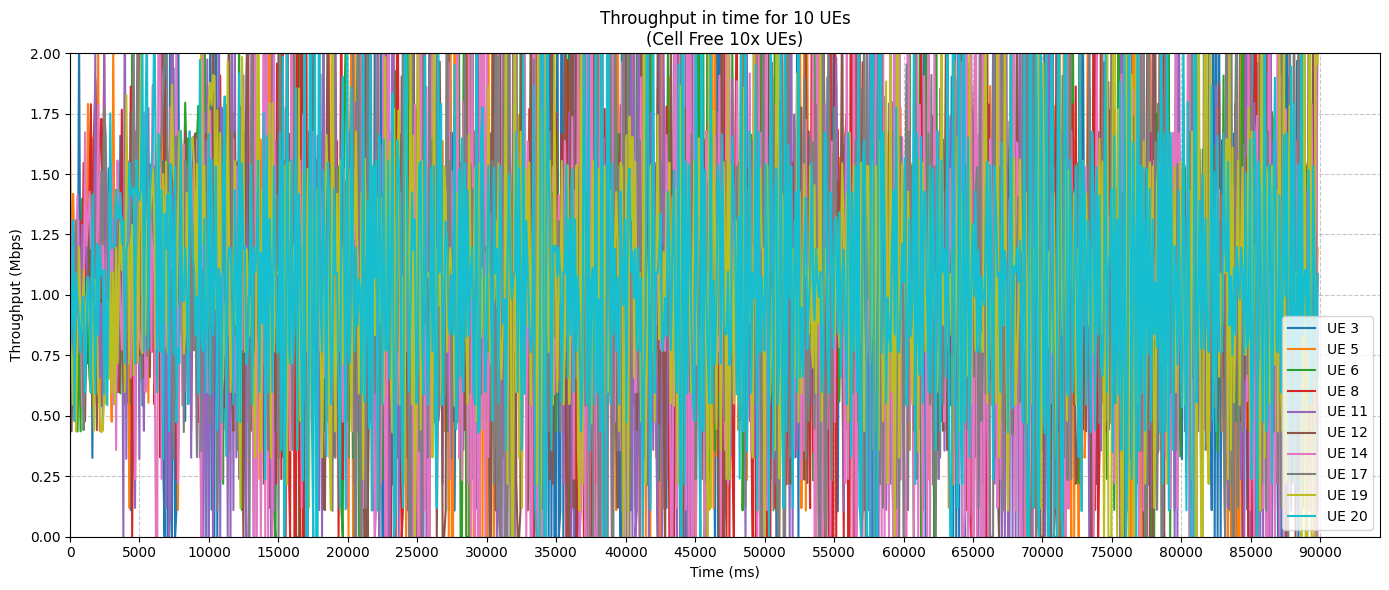

In [24]:
plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cf.items():
    dfs_cf[ue]["Throughput_Mbps"] = dfs_cf[ue]["Throughput_Mbps"].round(3)

    sns.lineplot(x="Time_ms", y="Throughput_Mbps", data=df, label=f"UE {ue}")

plt.title("Throughput in time for 10 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

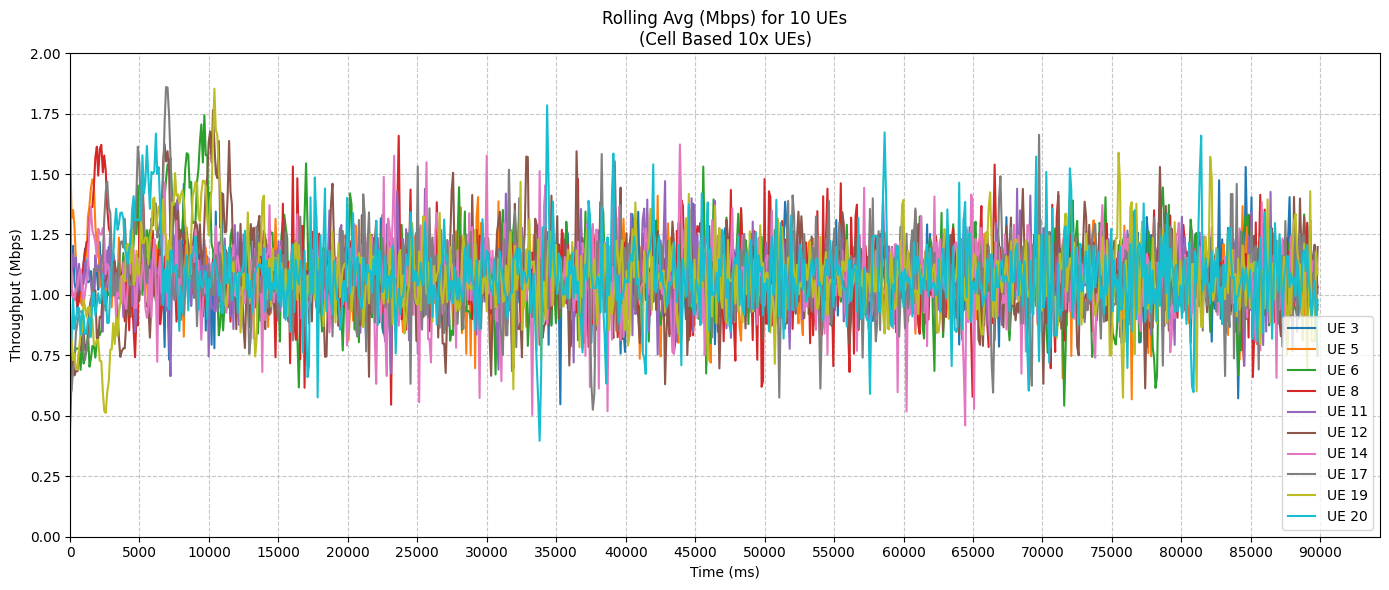

In [25]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comparisons between Cell-Free and Cell-based

## Rolling Average Comparison

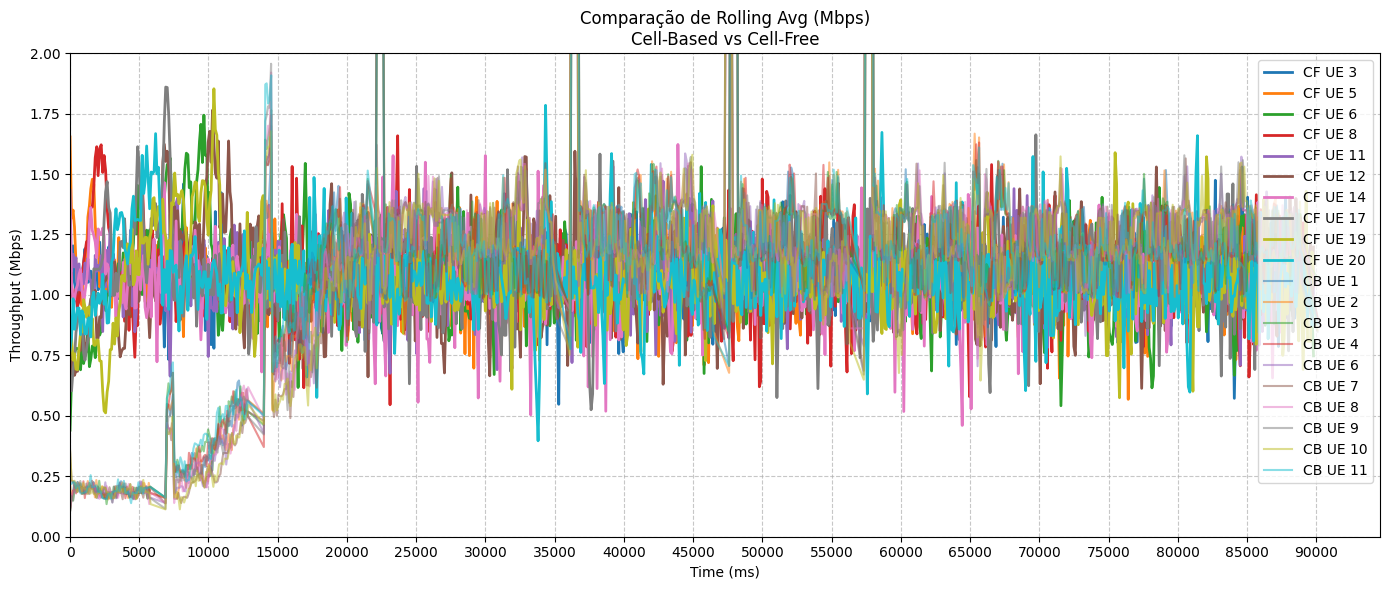

In [26]:
# Graphic of Throughput and Rolling Average for comparison
plt.figure(figsize=(14, 6))

# Cell-Free
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df, label=f"CF UE {ue}", linewidth=2.0)

# Cell-Based
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df, label=f"CB UE {ue}", alpha=0.5)


plt.title("Comparação de Rolling Avg (Mbps)\nCell-Based vs Cell-Free")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Total mean of rolling avg comparison

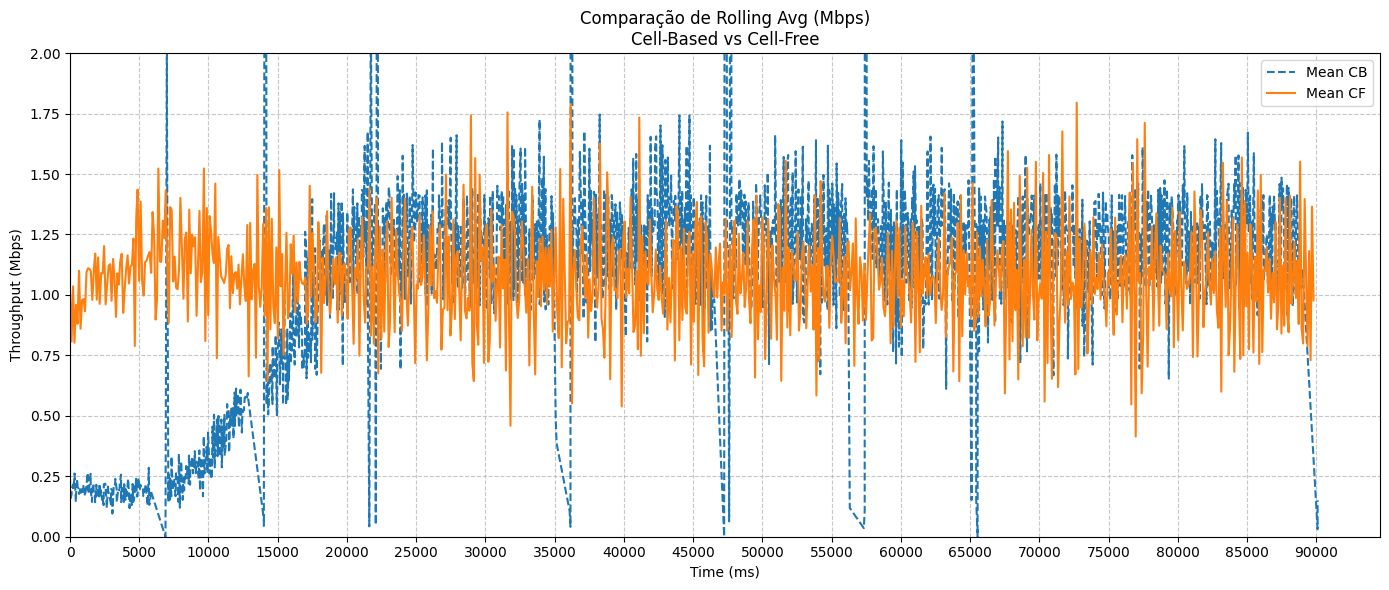

In [27]:
mean_cb = pd.concat(dfs_cb.values()).groupby("Time_ms")["Throughput_Mbps"].mean()
mean_cf = pd.concat(dfs_cf.values()).groupby("Time_ms")["Throughput_Mbps"].mean()

plt.figure(figsize=(14, 6))

plt.plot(mean_cb.index, mean_cb.values, label="Mean CB", linestyle='--')
plt.plot(mean_cf.index, mean_cf.values, label="Mean CF", linestyle='-')

plt.title("Comparação de Rolling Avg (Mbps)\nCell-Based vs Cell-Free")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Boxplot of throughput

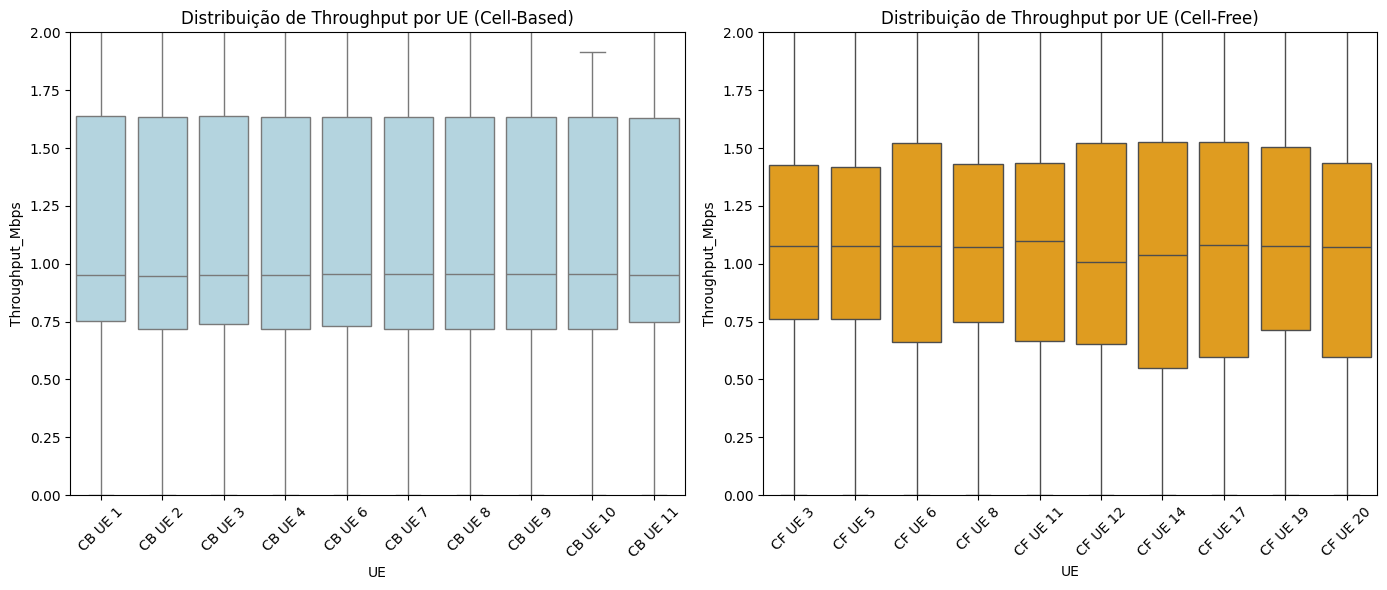

In [28]:
# Concatenate all DataFrames for Cell-Based and Cell-Free UEs
df_cb_all = pd.concat([
    df.assign(UE=f"CB UE {ue}") for ue, df in dfs_cb.items()
], ignore_index=True)

df_cf_all = pd.concat([
    df.assign(UE=f"CF UE {ue}") for ue, df in dfs_cf.items()
], ignore_index=True)

# Boxplot graphic for Throughput by UE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="UE", y="Throughput_Mbps", data=df_cb_all, color="lightblue")
plt.title("Distribuição de Throughput por UE (Cell-Based)")
plt.xticks(rotation=45)
plt.ylim(0, 2)

plt.subplot(1, 2, 2)
sns.boxplot(x="UE", y="Throughput_Mbps", data=df_cf_all, color='orange')
plt.title("Distribuição de Throughput por UE (Cell-Free)")
plt.xticks(rotation=45)
plt.ylim(0, 2)

plt.tight_layout()
plt.show()

## Heatmap of throughput per scene

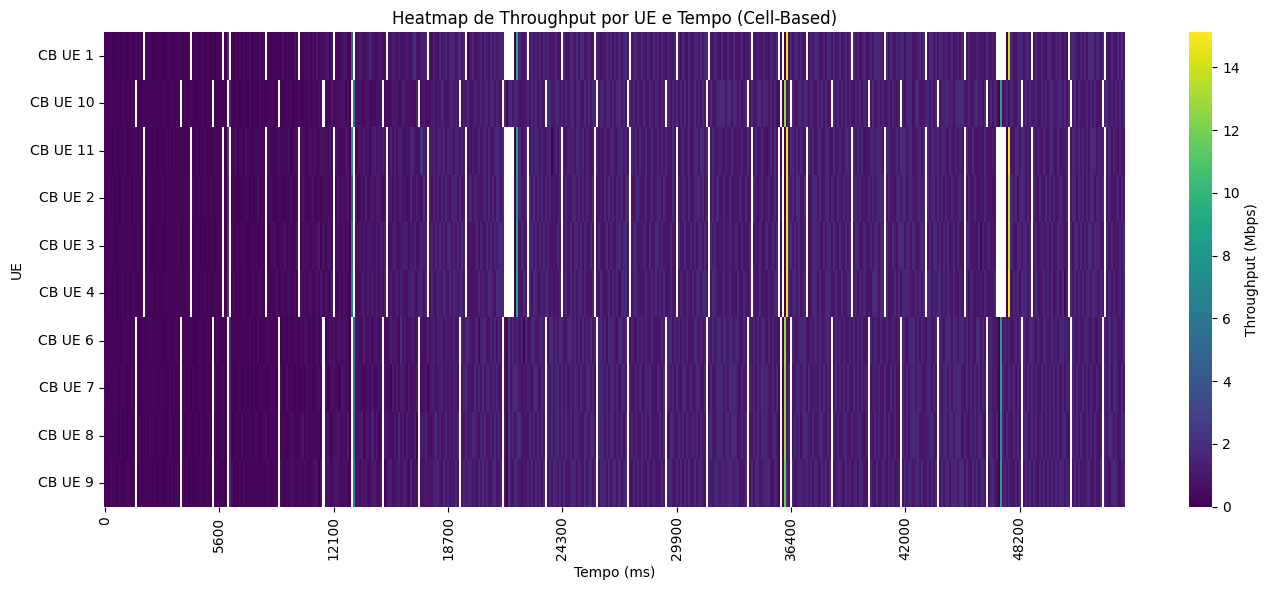

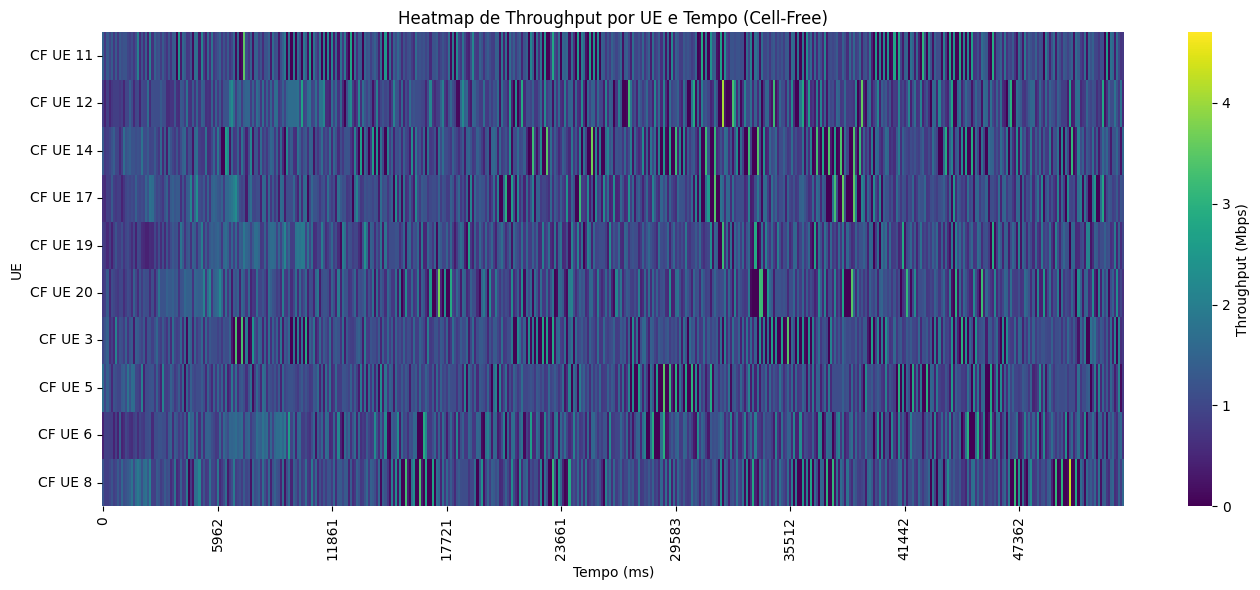

In [29]:

df_cb_all["Time_bin"] = (df_cb_all["Time_ms"] // 100) * 100

heat_cb = df_cb_all.pivot(index="UE", columns="Time_bin", values="Throughput_Mbps")
heat_cf = df_cf_all.pivot(index="UE", columns="Time_ms", values="Throughput_Mbps")


# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Throughput (Mbps)'})
plt.title("Heatmap de Throughput por UE e Tempo (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)

plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Throughput (Mbps)'})
plt.title("Heatmap de Throughput por UE e Tempo (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

## Main statistics 10x Scenarios

### Cell-Based

In [30]:
df_todos_cb = pd.concat(dfs_cb.values(), ignore_index=True)
print(df_todos_cb["Throughput_Mbps"].describe())

count    7950.000000
mean        1.113588
std         0.952155
min         0.000000
25%         0.719000
50%         0.955000
75%         1.636000
max        15.120000
Name: Throughput_Mbps, dtype: float64


### Cell-Free

In [31]:
df_todos_cf = pd.concat(dfs_cf.values(), ignore_index=True)
print(df_todos_cf["Throughput_Mbps"].describe())

count    8500.000000
mean        1.074330
std         0.640519
min         0.000000
25%         0.657000
50%         1.075000
75%         1.440000
max         4.699000
Name: Throughput_Mbps, dtype: float64
